In [ ]:
# Step1: Load the data file using pandas.

# Import pandas library
import pandas as pd
import csv

excel_csv_file_path = 'googleplaystore.csv'

# Read the CSV-formatted Excel file into a pandas DataFrame
df = pd.read_csv(excel_csv_file_path,encoding='latin-1')
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Step 2: Check for null values in the data. Get the number of null values for each column.

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

App
App
False    10841
Name: count, dtype: int64

Category
Category
False    10841
Name: count, dtype: int64

Rating
Rating
False    9367
True     1474
Name: count, dtype: int64

Reviews
Reviews
False    10841
Name: count, dtype: int64

Size
Size
False    10841
Name: count, dtype: int64

Installs
Installs
False    10841
Name: count, dtype: int64

Type
Type
False    10840
True         1
Name: count, dtype: int64

Price
Price
False    10841
Name: count, dtype: int64

Content Rating
Content Rating
False    10840
True         1
Name: count, dtype: int64

Genres
Genres
False    10841
Name: count, dtype: int64

Last Updated
Last Updated
False    10841
Name: count, dtype: int64

Current Ver
Current Ver
False    10833
True         8
Name: count, dtype: int64

Android Ver
Android Ver
False    10838
True         3
Name: count, dtype: int64



In [ ]:
# Step 3: Drop records with nulls in any of the columns.

df_cleaned = df.dropna()

print("DataFrame after dropping rows with NaN values:")
print(df_cleaned)
# now check again if there is a null value
has_null = df_cleaned.isnull().values.any()
print(f"Does the DataFrame contain any null values? {has_null}")


DataFrame after dropping rows with NaN values:
                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite â FREE Live Cool Themes, Hid...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology      

In [ ]:
#_ Step 4:
# Variables seem to have incorrect type and inconsistent formatting. You need to fix them:

# Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

# Extract the numeric value from the column
# Multiply the value by 1,000, if size is mentioned in Mb

# Convert 'Size' column to numeric (Mb to Kb)
df_cleaned['Size'] = df_cleaned['Size'].astype(str).str.replace('M', '000', regex=False).str.replace('K', '', regex=False)
df_cleaned['Size'] = pd.to_numeric(df_cleaned['Size'], errors='coerce')

# Convert 'Reviews' to numeric
df_cleaned['Reviews'] = pd.to_numeric(df_cleaned['Reviews'], errors='coerce')

# Clean 'Installs' column (remove ',' and '+', convert to int)
df_cleaned['Installs'] = df_cleaned['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df_cleaned['Installs'] = pd.to_numeric(df_cleaned['Installs'], errors='coerce', downcast='integer')

# Clean 'Price' column (remove '$' sign, convert 'Free' to 0, and make numeric)
df_cleaned['Price'] = df_cleaned['Price'].astype(str).str.replace('$', '', regex=False).str.replace('Free', '0', regex=False)
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')


/tmp/ipython-input-4-3760159844.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Size'] = df_cleaned['Size'].astype(str).str.replace('M', '000', regex=False).str.replace('K', '', regex=False)
/tmp/ipython-input-4-3760159844.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Size'] = pd.to_numeric(df_cleaned['Size'], errors='coerce')
/tmp/ipython-input-4-3760159844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [ ]:
# Step 5. Sanity checks:

# Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
# Drop rows where 'Average Rating' is outside the allowed range (1 to 5)
df_cleaned = df_cleaned[(df_cleaned['Rating'] >= 1) & (df_cleaned['Rating'] <= 5)]

# Drop rows where 'Reviews' are greater than 'Installs'
df_cleaned = df_cleaned[df_cleaned['Reviews'] <= df_cleaned['Installs']]

# Drop rows where 'Type' is "Free" but 'Price' is greater than 0
df_cleaned = df_cleaned[~((df_cleaned['Type'] == "Free") & (df_cleaned['Price'] > 0))]



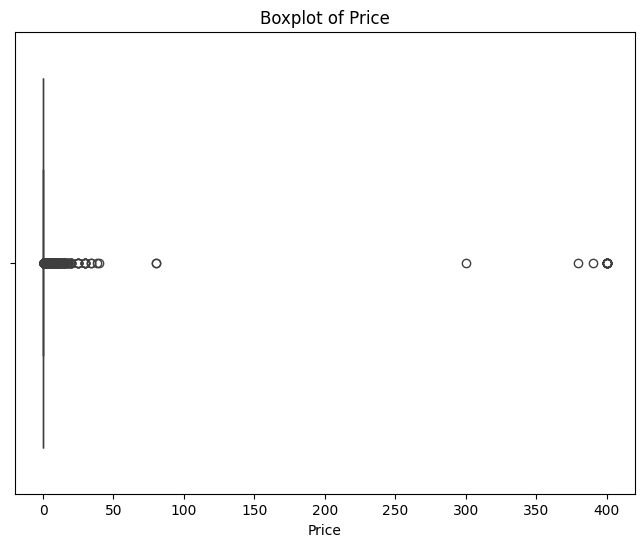

In [ ]:
# Step 6:
# Performing univariate analysis:

# Boxplot for Price. Are there any outliers? Think about the price of usual apps on Play Store.


import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Price column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

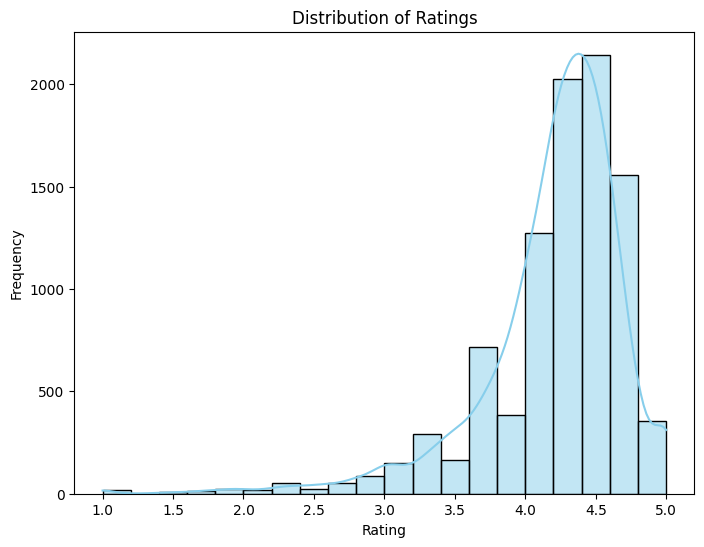

In [ ]:
# Plotting histogram for the 'Rating' column
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Rating'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()

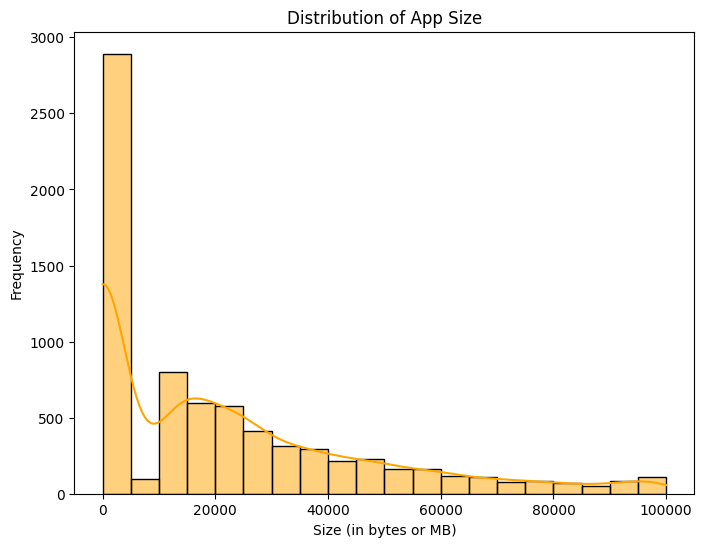

In [ ]:
# Plotting histogram for the 'Size' column
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Size'], bins=20, kde=True, color='orange', edgecolor='black')

# Adding title and labels
plt.title('Distribution of App Size')
plt.xlabel('Size (in bytes or MB)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

High priced apps (Price >= $200):
                                 App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY     4.3        6      1.5   
4362                   ð I'm rich  LIFESTYLE     3.8      718  26000.0   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275      7.3   
5351                       I am rich  LIFESTYLE     3.8     3547      1.8   
5354                  I am Rich Plus     FAMILY     4.0      856      8.7   
5355                   I am rich VIP  LIFESTYLE     3.8      411      2.6   
5356               I Am Rich Premium    FINANCE     4.1     1867      4.7   
5357             I am extremely Rich  LIFESTYLE     2.9       41      2.9   
5358                      I am Rich!    FINANCE     3.8       93  22000.0   
5359              I am rich(premium)    FINANCE     3.5      472      NaN   
5362                   I Am Rich Pro     FAMILY     4.4      201      2.7   
5364  I am rich (Most expensive app)    FI

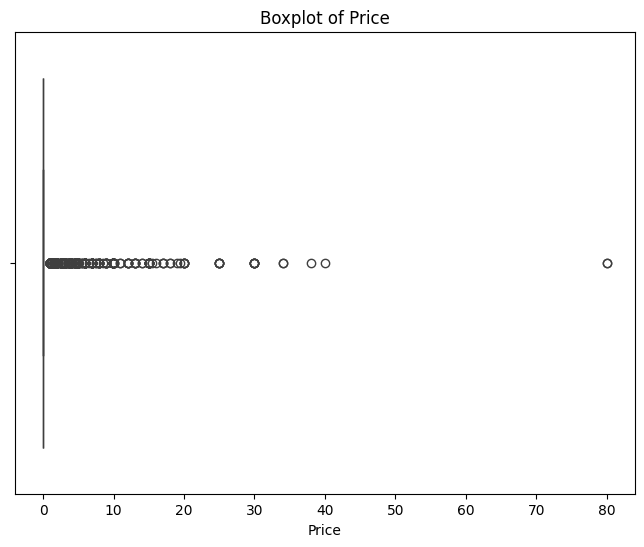

In [ ]:
# Step 6. Outlier treatment:

# Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
# Check out the records with very high price

# Filter records where Price is greater than or equal to $200
high_price_apps = df_cleaned[df_cleaned['Price'] >= 200]

# Display records with high price
print("High priced apps (Price >= $200):")
print(high_price_apps)

# Drop the rows with Price >= $200
df_cleaned = df_cleaned[df_cleaned['Price'] < 200]

# Verify that the rows with high price are dropped
print("\nDataframe after dropping high priced apps:")
print(df_cleaned.head())

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

In [ ]:
# Reviews: Very few apps have very high number of reviews.
#These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.
# Filter records where Reviews are greater than 2 million
high_review_apps = df_cleaned[df_cleaned['Reviews'] > 2000000]

# Display records with more than 2 million reviews
print("Apps with more than 2 million reviews:")
print(high_review_apps)

# Drop the rows where Reviews > 2 million
df_cleaned = df_cleaned[df_cleaned['Reviews'] <= 2000000]

# Verify that the rows with more than 2 million reviews are dropped
print("\nDataframe after dropping apps with more than 2 million reviews:")
print(df_cleaned.head())


Apps with more than 2 million reviews:
                                              App             Category  \
139                       Wattpad ð Free Books  BOOKS_AND_REFERENCE   
335    Messenger â Text and Video Chat for Free        COMMUNICATION   
336                            WhatsApp Messenger        COMMUNICATION   
338                  Google Chrome: Fast & Secure        COMMUNICATION   
340                                         Gmail        COMMUNICATION   
...                                           ...                  ...   
9166                 Modern Combat 5: eSports FPS                 GAME   
9841                                 Google Earth     TRAVEL_AND_LOCAL   
10186                            Farm Heroes Saga               FAMILY   
10190                             Fallout Shelter               FAMILY   
10327                            Garena Free Fire                 GAME   

       Rating   Reviews     Size    Installs  Type  Price Content Rating

In [ ]:
# Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

# Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
# Calculate the percentiles for the 'Installs' column
percentiles = df_cleaned['Installs'].quantile([0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99])

# Display the calculated percentiles
print("Percentiles for 'Installs' column:")
print(percentiles)

Percentiles for 'Installs' column:
0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64


In [ ]:
# Decide a threshold as cutoff for outlier and drop records having values more than that
# Calculate the 99th percentile for 'Installs'
percentile_99 = df_cleaned['Installs'].quantile(0.99)

# Set the threshold for dropping outliers (values beyond the 99th percentile)
print(f"99th Percentile for Installs: {percentile_99}")

# Drop records with 'Installs' greater than the 99th percentile
df_cleaned = df_cleaned[df_cleaned['Installs'] <= percentile_99]

# Check the shape of the DataFrame after dropping outliers
print(f"Dataframe shape after removing outliers: {df_cleaned.shape}")



99th Percentile for Installs: 100000000.0
Dataframe shape after removing outliers: (8865, 13)


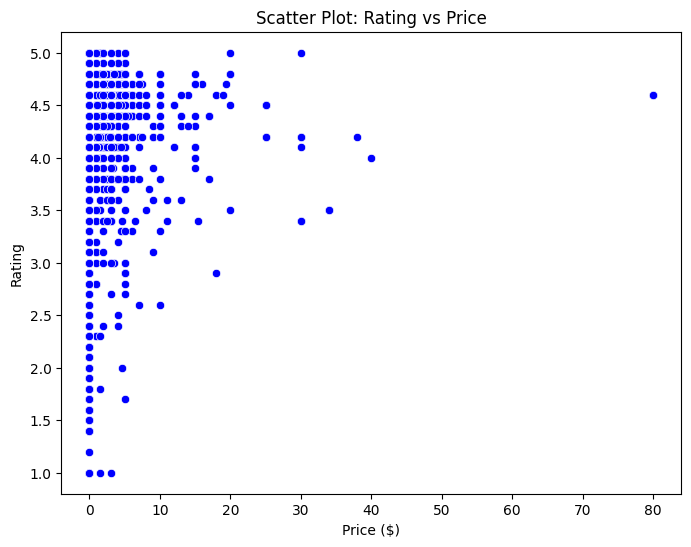

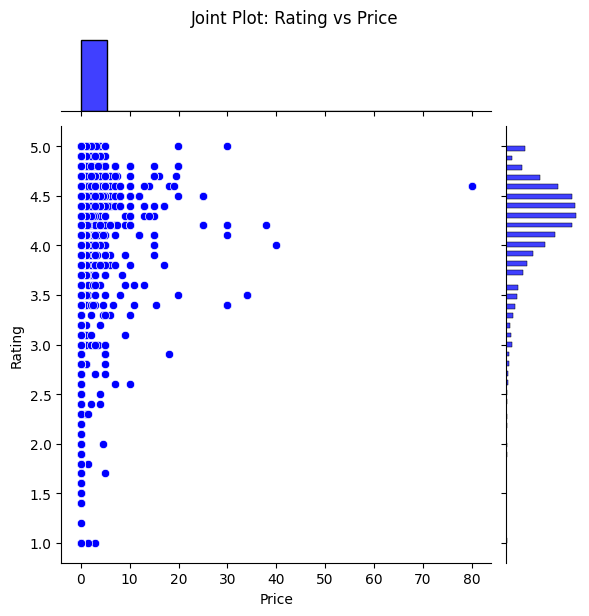

In [ ]:
# Step 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

# Make scatter plot/joinplot for Rating vs. Price
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between 'Rating' and 'Price'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Price', y='Rating', color='blue')
plt.title('Scatter Plot: Rating vs Price')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.show()

# Alternatively, using a joint plot
sns.jointplot(data=df_cleaned, x='Price', y='Rating', kind='scatter', color='blue')
plt.suptitle('Joint Plot: Rating vs Price', y=1.02)
plt.show()

#What pattern do you observe? Does rating increase with price?
#price doesn't influence ratings significantly.

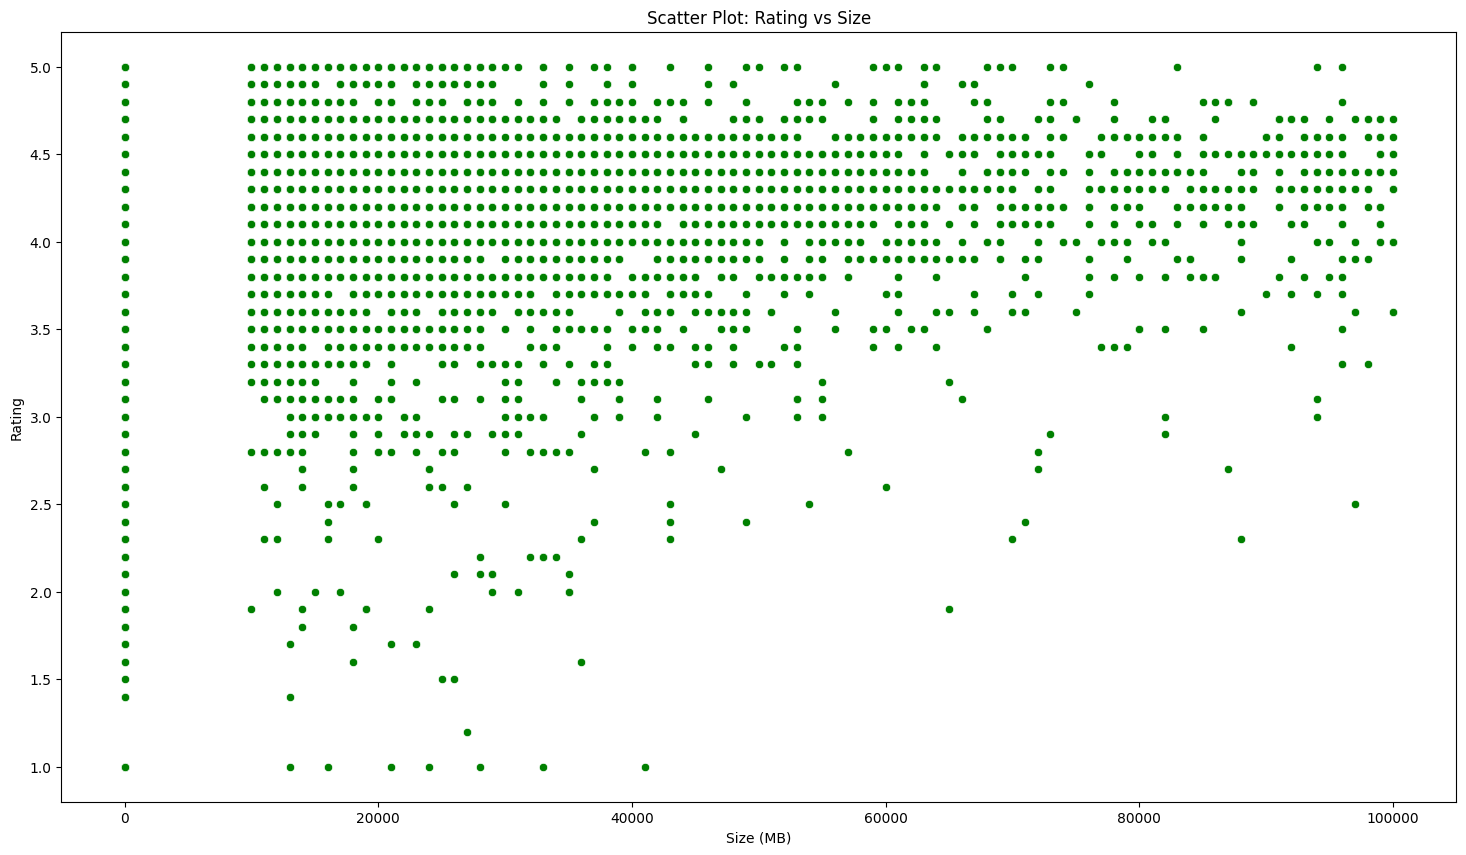

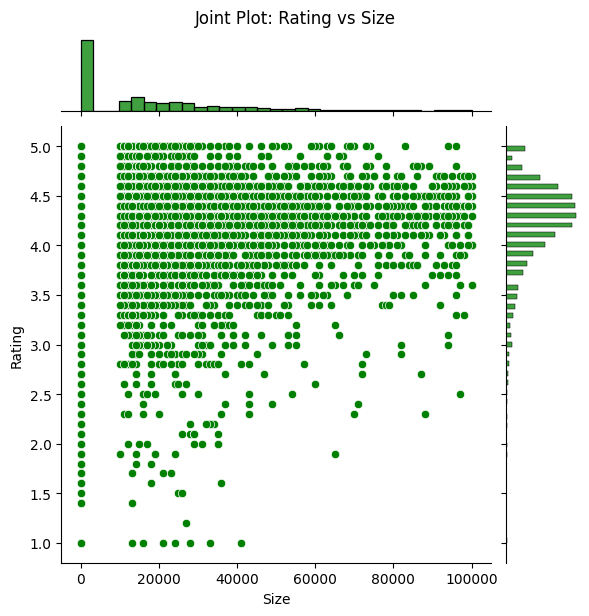

In [ ]:
# Make scatter plot/joinplot for Rating vs. Size

#Are heavier apps rated better
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between 'Rating' and 'Size'
plt.figure(figsize=(18, 10))
sns.scatterplot(data=df_cleaned, x='Size', y='Rating', color='green')
plt.title('Scatter Plot: Rating vs Size')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

# Alternatively, using a joint plot
sns.jointplot(data=df_cleaned, x='Size', y='Rating', kind='scatter', color='green')
plt.suptitle('Joint Plot: Rating vs Size', y=1.02)
plt.show()


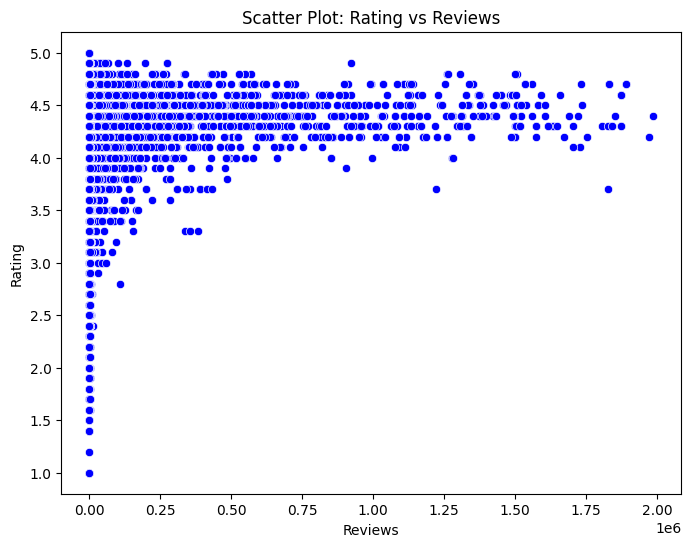

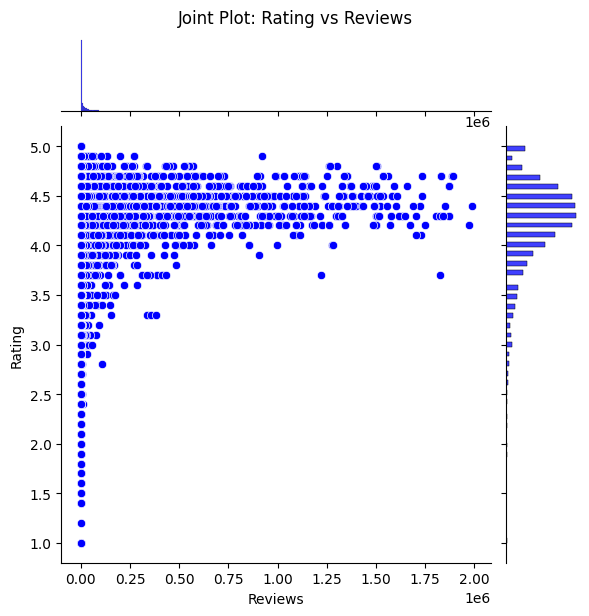

In [ ]:
#Make scatter plot/joinplot for Rating vs. Reviews

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between 'Rating' and 'Reviews'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Reviews', y='Rating', color='blue')
plt.title('Scatter Plot: Rating vs Reviews')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()

# Alternatively, using a joint plot
sns.jointplot(data=df_cleaned, x='Reviews', y='Rating', kind='scatter', color='blue')
plt.suptitle('Joint Plot: Rating vs Reviews', y=1.02)
plt.show()

/tmp/ipython-input-16-2720412654.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Content Rating', y='Rating', palette='Set2')


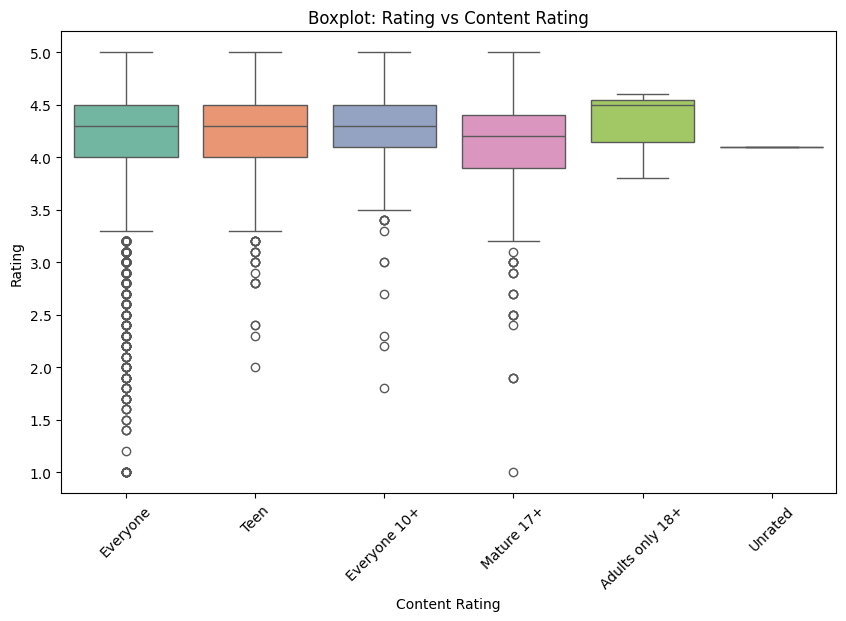

In [ ]:
# Make boxplot for Rating vs. Content Rating


import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot between 'Rating' and 'Content Rating'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Content Rating', y='Rating', palette='Set2')
plt.title('Boxplot: Rating vs Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-17-4101808574.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Category', y='Rating', palette='Set3')


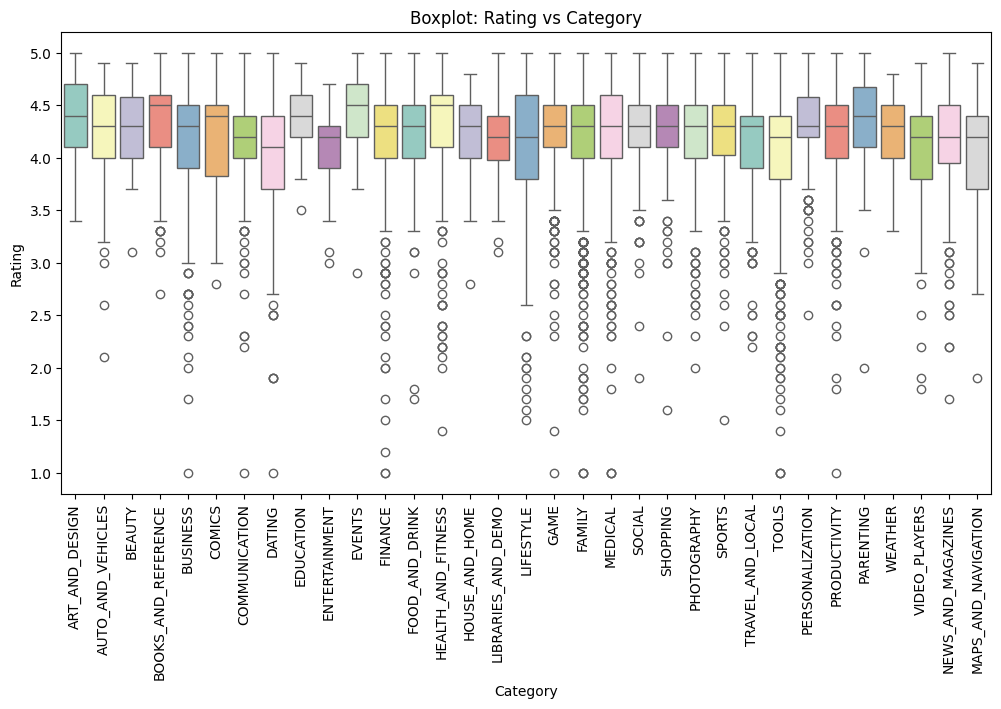

In [ ]:
#Make boxplot for Ratings vs. Category


import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot between 'Rating' and 'Category'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Category', y='Rating', palette='Set3')
plt.title('Boxplot: Rating vs Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# 8. Data preprocessing
import numpy as np
import pandas as pd

# Step 1: Create a copy of the dataframe (inp1)
inp1 = df_cleaned.copy()

# Step 2: Apply log transformation to 'Reviews' and 'Installs' columns to reduce skew
inp1['Reviews'] = np.log1p(inp1['Reviews'])  # log transformation of Reviews
inp1['Installs'] = np.log1p(inp1['Installs'])  # log transformation of Installs

# Step 3: Drop the columns 'App', 'Last Updated', 'Current Ver', 'Android Ver'
inp1 = inp1.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'])

# Step 4: Get dummy columns for 'Category', 'Genres', and 'Content Rating'
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating'], drop_first=True)

# Display the first few rows of inp2 to confirm changes
inp2.head()


,Rating,Reviews,Size,Installs,Type,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,Free,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,3.9,6.875232,14000.0,13.122365,Free,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,4.7,11.379520,8.7,15.424949,Free,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4.5,12.281389,25000.0,17.727534,Free,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4.3,6.875232,2.8,11.512935,Free,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
#step 9:
from sklearn.model_selection import train_test_split

# Step 1: Train-test split (70-30)
df_train, df_test = train_test_split(inp2, test_size=0.3, random_state=42)

In [ ]:
#step 10:
# Step 2: Separate features (X) and target variable (y)
X_train = df_train.drop(columns=["Rating"])
y_train = df_train["Rating"]

X_test = df_test.drop(columns=["Rating"])
y_test = df_test["Rating"]

# Print shapes to verify
print(f"df_train shape: {df_train.shape}, df_test shape: {df_test.shape}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

df_train shape: (6205, 157), df_test shape: (2660, 157)
X_train shape: (6205, 156), y_train shape: (6205,)
X_test shape: (2660, 156), y_test shape: (2660,)


In [ ]:
#11 . Model building

#Use linear regression as the technique

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Handle missing values: Replace "Free" with 0 in the 'Price' column
X_train = X_train.replace("Free", 0)
X_test = X_test.replace("Free", 0)

# Convert all columns to numeric (if any categorical values remain)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the median strategy
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Calculate and print R² for the training set
r2_train = model.score(X_train_imputed, y_train)
print(f"R² on the train set: {r2_train:.4f}")


R² on the train set: 0.1660


In [ ]:
# 12. Make predictions on test set and report R2.

from sklearn.metrics import r2_score

# Impute missing values in the test set using the same imputer
X_test_imputed = imputer.transform(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Calculate R² for the test set
r2_test = r2_score(y_test, y_pred)
print(f"R² on the test set: {r2_test:.4f}")


R² on the test set: 0.1288
